<a href="https://colab.research.google.com/github/SampatPolireddi/ML_Projects/blob/main/Music__Genre__Classification_using__30sec_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
seed = 12
import librosa #Python package for music & audio files
import librosa.display
import librosa.display as lplt
import sklearn
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import sklearn.ensemble as ske
import xgboost as xgb
import catboost as cb
from sklearn.metrics import  classification_report,plot_confusion_matrix,confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/music_df/Data/features_30_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
data.shape

(1000, 59)

In [ ]:
data.columns

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   1000 non-null   int64  
 1   chroma_stft_mean         1000 non-null   float64
 2   chroma_stft_var          1000 non-null   float64
 3   rms_mean                 1000 non-null   float64
 4   rms_var                  1000 non-null   float64
 5   spectral_centroid_mean   1000 non-null   float64
 6   spectral_centroid_var    1000 non-null   float64
 7   spectral_bandwidth_mean  1000 non-null   float64
 8   spectral_bandwidth_var   1000 non-null   float64
 9   rolloff_mean             1000 non-null   float64
 10  rolloff_var              1000 non-null   float64
 11  zero_crossing_rate_mean  1000 non-null   float64
 12  zero_crossing_rate_var   1000 non-null   float64
 13  harmony_mean             1000 non-null   float64
 14  harmony_var              

In [ ]:
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


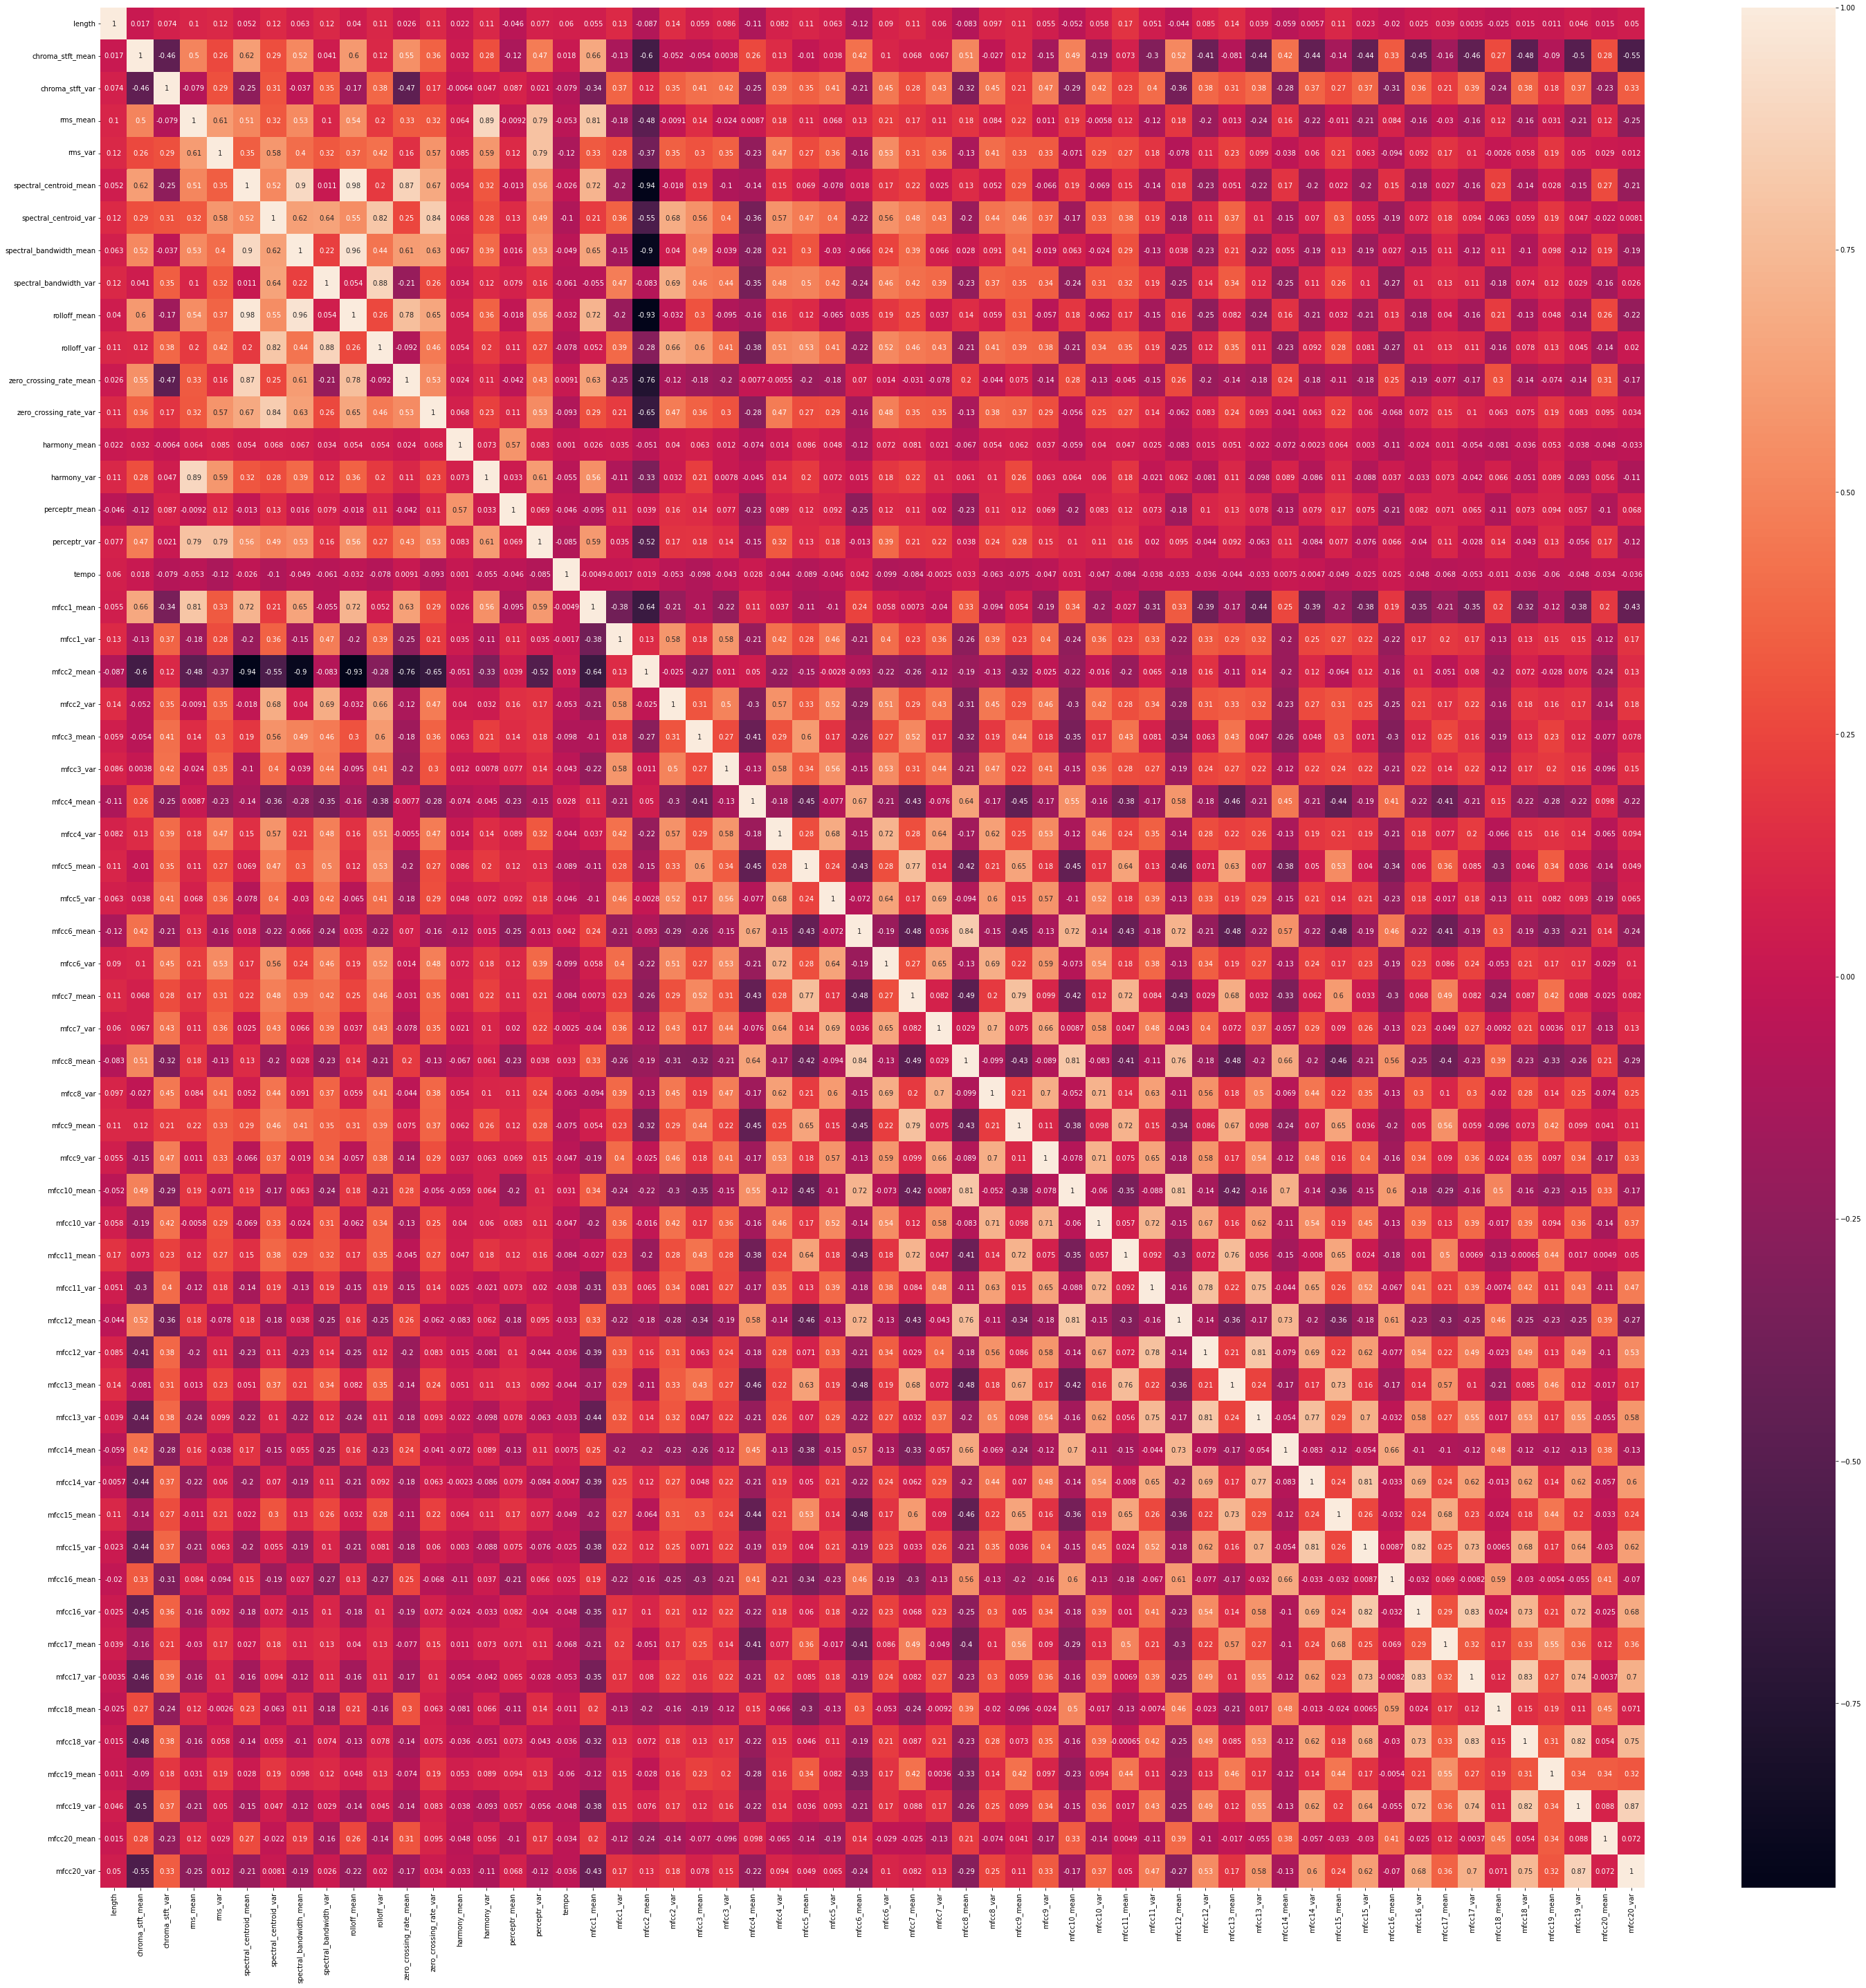

In [ ]:
plt.figure(figsize=(50, 50))
sns.heatmap(data.corr(), annot=True)

In [ ]:
y = data['label'] 
X = data.loc[:, data.columns != 'label'] 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns = cols)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def me(model, title = "Default"):
    preds = model.predict(X_test)
    print('Classification Report \n')
    print(classification_report(y_test,preds))
    confusion_matr = confusion_matrix(y_test, preds) 
    plt.figure(figsize = (9, 9))
    sns.heatmap(confusion_matr, cmap="Blues", annot=True, xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
                yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

Classification Report 

              precision    recall  f1-score   support

       blues       0.72      0.37      0.49        35
   classical       0.61      0.95      0.75        20
     country       0.46      0.65      0.54        37
       disco       0.54      0.59      0.56        34
      hiphop       0.72      0.54      0.62        24
        jazz       0.83      0.45      0.59        33
       metal       0.69      0.90      0.78        30
         pop       0.59      0.87      0.70        23
      reggae       0.46      0.45      0.46        29
        rock       0.40      0.29      0.33        35

    accuracy                           0.58       300
   macro avg       0.60      0.61      0.58       300
weighted avg       0.60      0.58      0.57       300

Accuracy KNN : 0.58 



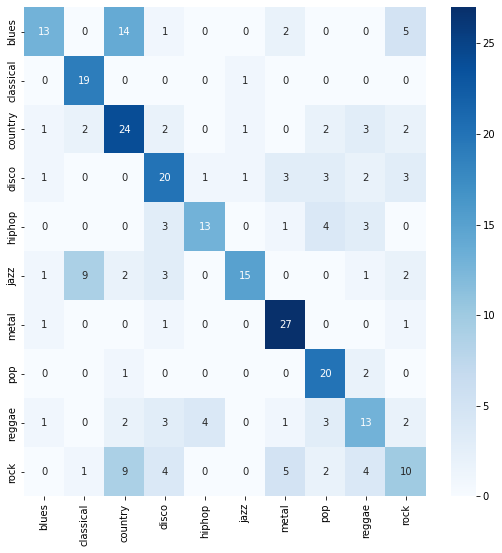

In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
me(knn, "KNN")




In [ ]:
X_predict = list(knn.predict(X_test))
predicted_df = {'original_values': y_test,'predicted_values': X_predict}
#creating new dataframe
pd.DataFrame(predicted_df).sample(11)

,original_values,predicted_values
481,hiphop,reggae
796,pop,pop
184,classical,classical
575,jazz,disco
501,jazz,classical
708,pop,pop
249,country,classical
227,country,country
298,country,country
636,metal,metal


Classification Report 

              precision    recall  f1-score   support

       blues       0.62      0.46      0.52        35
   classical       0.91      1.00      0.95        20
     country       0.64      0.57      0.60        37
       disco       0.56      0.59      0.57        34
      hiphop       0.68      0.71      0.69        24
        jazz       0.90      0.82      0.86        33
       metal       0.56      0.93      0.70        30
         pop       0.78      0.78      0.78        23
      reggae       0.58      0.52      0.55        29
        rock       0.38      0.31      0.34        35

    accuracy                           0.64       300
   macro avg       0.66      0.67      0.66       300
weighted avg       0.64      0.64      0.64       300

Accuracy Support Vector Machine : 0.64333 



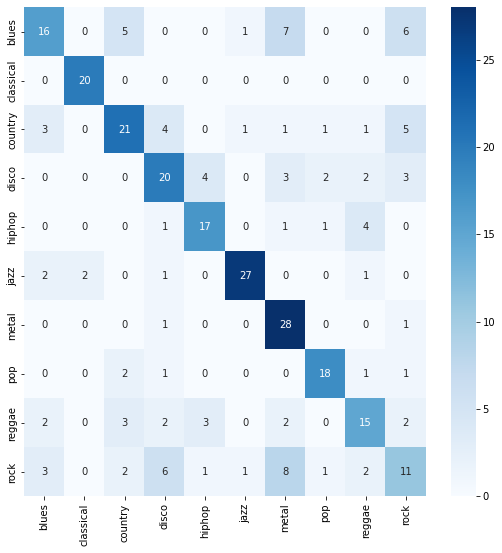

In [ ]:
sm = SVC(decision_function_shape="ovo")
sm.fit(X_train, y_train)
me(sm, "Support Vector Machine")



Classification Report 

              precision    recall  f1-score   support

       blues       0.47      0.51      0.49        35
   classical       0.65      0.85      0.74        20
     country       0.61      0.38      0.47        37
       disco       0.65      0.65      0.65        34
      hiphop       0.50      0.62      0.56        24
        jazz       0.59      0.52      0.55        33
       metal       0.64      0.70      0.67        30
         pop       0.76      0.70      0.73        23
      reggae       0.66      0.66      0.66        29
        rock       0.22      0.23      0.22        35

    accuracy                           0.56       300
   macro avg       0.57      0.58      0.57       300
weighted avg       0.56      0.56      0.55       300

Accuracy Decision trees : 0.55667 



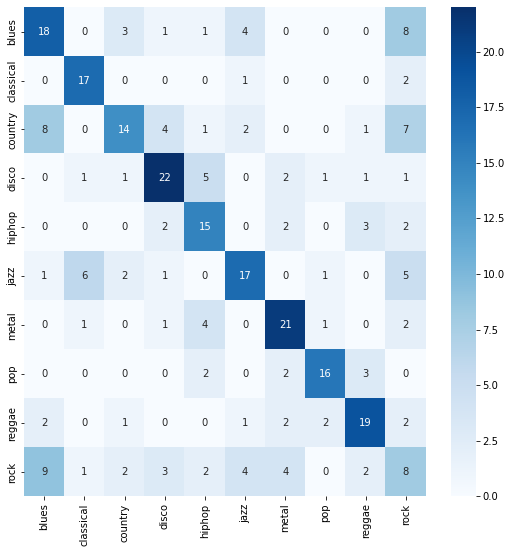

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
me(dt, "Decision trees")


Classification Report 

              precision    recall  f1-score   support

       blues       0.85      0.66      0.74        35
   classical       0.87      1.00      0.93        20
     country       0.68      0.70      0.69        37
       disco       0.84      0.62      0.71        34
      hiphop       0.60      0.75      0.67        24
        jazz       0.90      0.85      0.88        33
       metal       0.67      0.97      0.79        30
         pop       0.86      0.83      0.84        23
      reggae       0.65      0.69      0.67        29
        rock       0.57      0.49      0.52        35

    accuracy                           0.74       300
   macro avg       0.75      0.75      0.74       300
weighted avg       0.75      0.74      0.73       300

Accuracy Random Forest : 0.73667 



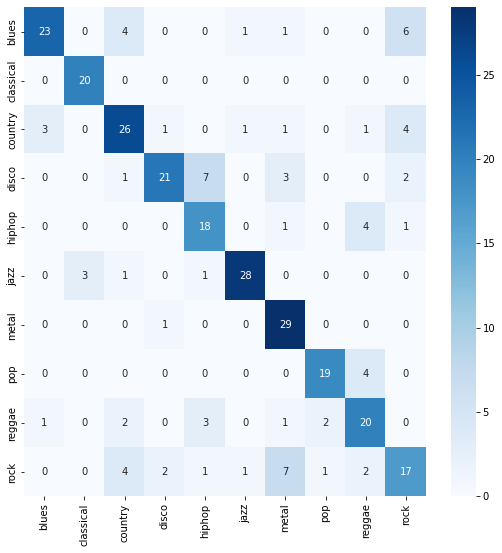

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rf.fit(X_train, y_train)
me(rf, "Random Forest")

In [ ]:
X_predict = list(rf.predict(X_test))
predicted_df = {'original_values': y_test,'predicted_values': X_predict}
#creating new dataframe
pd.DataFrame(predicted_df).sample(11)

,original_values,predicted_values
578,jazz,jazz
259,country,blues
430,hiphop,rock
281,country,country
816,reggae,blues
837,reggae,reggae
247,country,jazz
668,metal,metal
643,metal,metal
305,disco,disco


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report 

              precision    recall  f1-score   support

       blues       0.46      0.46      0.46        35
   classical       0.87      1.00      0.93        20
     country       0.70      0.51      0.59        37
       disco       0.65      0.44      0.53        34
      hiphop       0.63      0.71      0.67        24
        jazz       0.87      0.79      0.83        33
       metal       0.53      0.90      0.67        30
         pop       0.66      0.83      0.73        23
      reggae       0.50      0.52      0.51        29
        rock       0.48      0.34      0.40        35

    accuracy                           0.62       300
   macro avg       0.63      0.65      0.63       300
weighted avg       0.63      0.62      0.61       300

Accuracy Logistic Regression : 0.62 



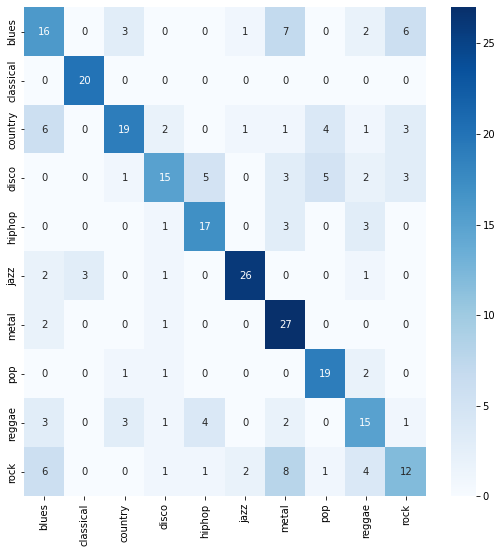

In [ ]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
lg.fit(X_train, y_train)
me(lg, "Logistic Regression")

Classification Report 

              precision    recall  f1-score   support

       blues       0.28      0.60      0.38        35
   classical       0.82      0.90      0.86        20
     country       0.62      0.22      0.32        37
       disco       0.53      0.50      0.52        34
      hiphop       0.59      0.54      0.57        24
        jazz       0.69      0.27      0.39        33
       metal       0.43      0.90      0.58        30
         pop       0.89      0.74      0.81        23
      reggae       0.45      0.34      0.39        29
        rock       0.37      0.20      0.26        35

    accuracy                           0.49       300
   macro avg       0.57      0.52      0.51       300
weighted avg       0.55      0.49      0.48       300

Accuracy Naive Bayes : 0.49 



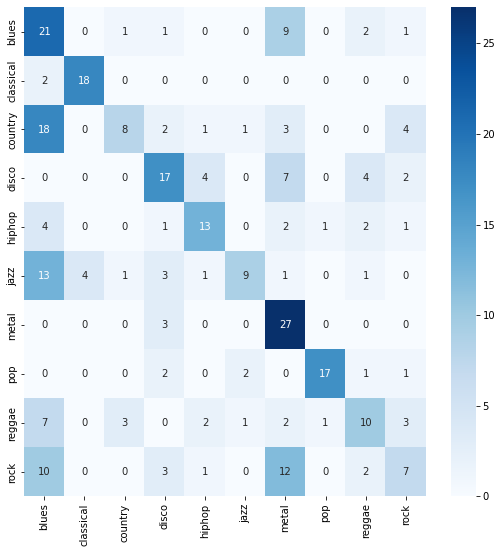

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
me(nb, "Naive Bayes")

Classification Report 

              precision    recall  f1-score   support

       blues       0.76      0.71      0.74        35
   classical       0.91      1.00      0.95        20
     country       0.79      0.70      0.74        37
       disco       0.89      0.74      0.81        34
      hiphop       0.73      0.92      0.81        24
        jazz       0.94      0.88      0.91        33
       metal       0.80      0.93      0.86        30
         pop       0.78      0.91      0.84        23
      reggae       0.70      0.55      0.62        29
        rock       0.61      0.66      0.63        35

    accuracy                           0.78       300
   macro avg       0.79      0.80      0.79       300
weighted avg       0.79      0.78      0.78       300

Accuracy Cross Gradient Booster : 0.78333 



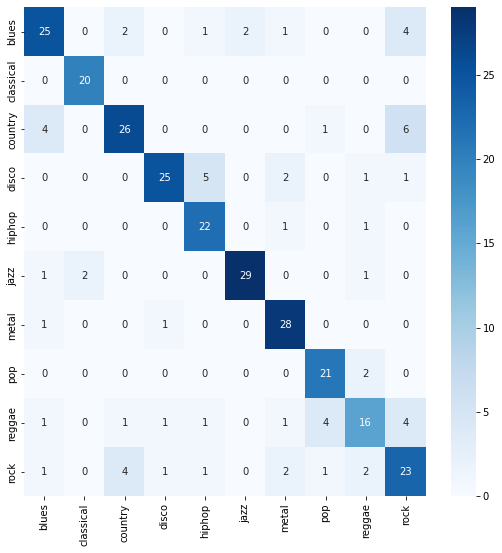

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)
me(xgb, "Cross Gradient Booster")

In [ ]:
X_predict = list(xgb.predict(X_test))
predicted_df = {'original_values': y_test,'predicted_values': X_predict}
#creating new dataframe
pd.DataFrame(predicted_df).sample(11)

,original_values,predicted_values
522,jazz,jazz
849,reggae,pop
428,hiphop,hiphop
120,classical,classical
39,blues,blues
357,disco,disco
617,metal,metal
49,blues,jazz
359,disco,disco
451,hiphop,hiphop


Classification Report 

              precision    recall  f1-score   support

       blues       0.24      0.91      0.38        35
   classical       0.58      0.90      0.71        20
     country       0.00      0.00      0.00        37
       disco       0.00      0.00      0.00        34
      hiphop       0.24      0.58      0.34        24
        jazz       0.00      0.00      0.00        33
       metal       0.39      0.53      0.45        30
         pop       0.39      0.65      0.49        23
      reggae       0.00      0.00      0.00        29
        rock       0.00      0.00      0.00        35

    accuracy                           0.32       300
   macro avg       0.18      0.36      0.24       300
weighted avg       0.16      0.32      0.20       300

Accuracy Ada Gradient Booster : 0.31667 



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


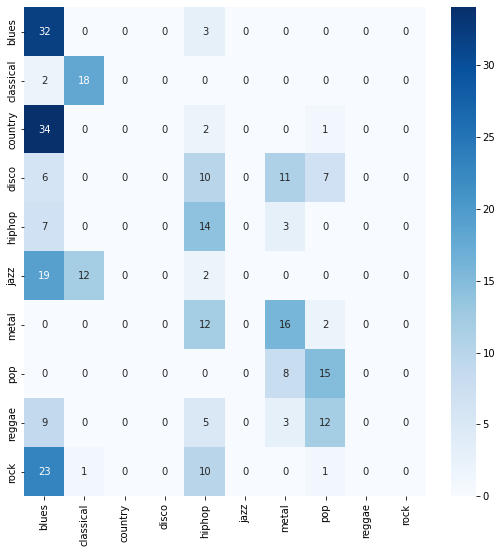

In [ ]:
abc = ske.AdaBoostClassifier(n_estimators=100, random_state=seed)
abc.fit(X_train, y_train)
me(abc, "Ada Gradient Booster")

Classification Report 

              precision    recall  f1-score   support

       blues       0.79      0.74      0.76        35
   classical       0.90      0.95      0.93        20
     country       0.62      0.62      0.62        37
       disco       0.82      0.68      0.74        34
      hiphop       0.64      0.75      0.69        24
        jazz       0.93      0.85      0.89        33
       metal       0.80      0.93      0.86        30
         pop       0.83      0.83      0.83        23
      reggae       0.70      0.66      0.68        29
        rock       0.55      0.60      0.58        35

    accuracy                           0.75       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.75      0.75      0.75       300

Accuracy  Gradient Booster : 0.74667 



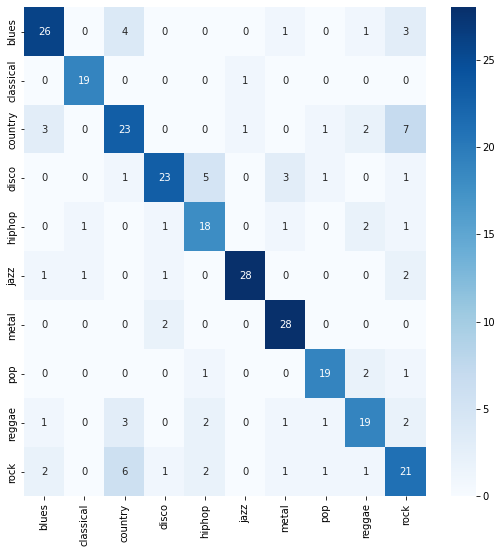

In [ ]:
gbc = ske.GradientBoostingClassifier(n_estimators=100, random_state=seed)
gbc.fit(X_train, y_train)
me(gbc, " Gradient Booster")

In [ ]:
X_predict = list(gbc.predict(X_test))
predicted_df = {'original_values': y_test,'predicted_values': X_predict}
#creating new dataframe
pd.DataFrame(predicted_df).sample(11)

,original_values,predicted_values
139,classical,classical
208,country,country
826,reggae,reggae
695,metal,metal
425,hiphop,hiphop
734,pop,pop
845,reggae,reggae
892,reggae,reggae
829,reggae,hiphop
595,jazz,jazz


Classification Report 

              precision    recall  f1-score   support

       blues       0.85      0.80      0.82        35
   classical       0.87      1.00      0.93        20
     country       0.79      0.73      0.76        37
       disco       0.83      0.71      0.76        34
      hiphop       0.65      0.71      0.68        24
        jazz       0.93      0.82      0.87        33
       metal       0.78      0.93      0.85        30
         pop       0.81      0.91      0.86        23
      reggae       0.73      0.76      0.75        29
        rock       0.65      0.63      0.64        35

    accuracy                           0.79       300
   macro avg       0.79      0.80      0.79       300
weighted avg       0.79      0.79      0.79       300

Accuracy Cat Gradient Booster : 0.78667 



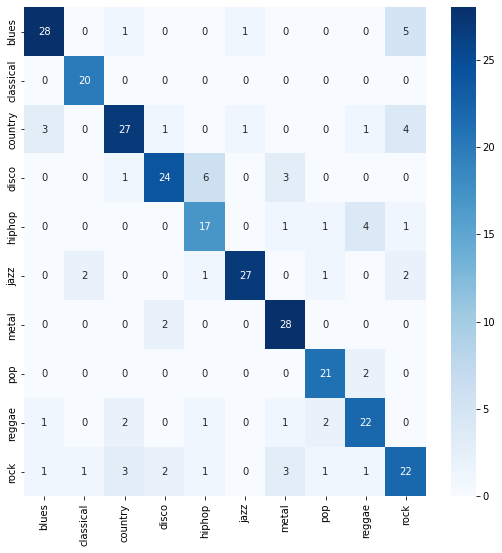

In [ ]:
cbc = cb.CatBoostClassifier(random_state=seed, verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
cbc.fit(X_train, y_train)
me(cbc, "Cat Gradient Booster")

In [ ]:
X_predict = list(cbc.predict(X_test))
predicted_df = {'original_values': y_test,'predicted_values': X_predict}
#creating new dataframe
pd.DataFrame(predicted_df).sample(11)

,original_values,predicted_values
717,pop,[pop]
697,metal,[metal]
86,blues,[blues]
941,rock,[rock]
296,country,[blues]
924,rock,[rock]
65,blues,[rock]
81,blues,[rock]
826,reggae,[reggae]
827,reggae,[reggae]


Results

In [ ]:
from pandas import DataFrame 
Data = {'Model': ['XGB','Naive Bayes','AdaBoost','Cat Boost','GB','Logistic','RandomForest','DecisionTree','SVM','KNN','CNN','RNN-LSTM'],
        'Accuracy': [0.78 ,0.49,0.31 ,0.78,0.74,0.62,0.74 ,0.53,0.64,0.58,0.75,0.59]
       }
  
df = DataFrame(Data,columns=['Model','Accuracy'])
df=df.sort_values(by=['Accuracy'],ascending=False)
print (df)

           Model  Accuracy
0            XGB      0.78
3      Cat Boost      0.78
10           CNN      0.75
4             GB      0.74
6   RandomForest      0.74
8            SVM      0.64
5       Logistic      0.62
11      RNN-LSTM      0.59
9            KNN      0.58
7   DecisionTree      0.53
1    Naive Bayes      0.49
2       AdaBoost      0.31


<BarContainer object of 12 artists>

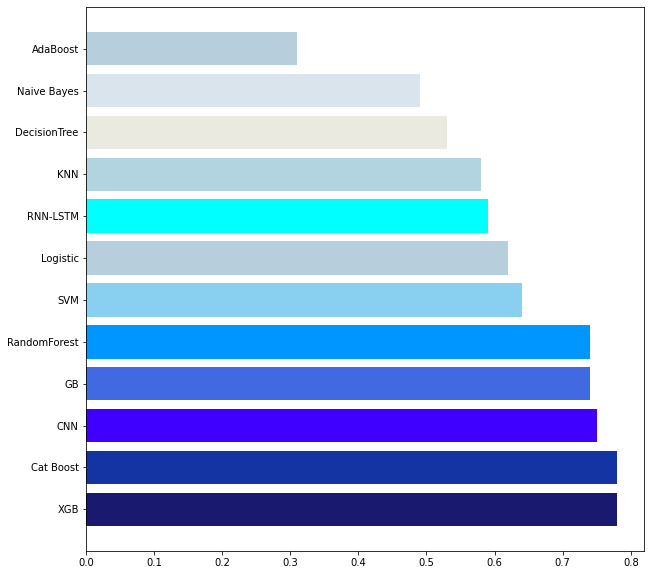

In [ ]:
plt.figure(figsize = (10,10))
plt.barh(df['Model'], df['Accuracy'],color=['#191970','#1434A4','#3F00FF','#4169E1','#0096FF','#89CFF0','#B7CFDC','#00FFFF','#B1D4E0','#EAEAE0','#D9E4EC','#B7CFDC'])